In [27]:
from arcgis.gis import GIS
import arcgis
import arcgis.network as network
from arcgis.features import FeatureLayer, Feature, FeatureSet, use_proximity, FeatureCollection
import pandas as pd
from arcgis.raster.functions import stretch, extract_band
import getpass
import time
import datetime as dt

In [2]:
#Connect to my account

password= getpass.getpass("Enter pass")
gis= GIS("https://www.arcgis.com", "Nodira_Tillayeva_LearnArcGIS", password)
print("Connected to {}".format(gis.properties.urlKey+"."+gis.properties.customBaseUrl))

Connected to learngis2.maps.arcgis.com


<Item title:"Растительность в оазисе Эль-Фаюм." type:Imagery Layer owner:Kirill_Dudenko_LearnArcGIS>
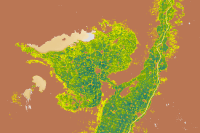

In [18]:
items=gis.content.search("Sentinel")

for item in items:
    display(item)
    

In [19]:
landast=items[0]

In [20]:
imglyr=landast.layers[0]

In [30]:
elfayum=arcgis.geocoding.geocode("El Fayoum")[0]


In [31]:
map1=gis.map(elfayum, zoomlevel=13)
map1

MapView(layout=Layout(height='400px', width='100%'))

In [32]:
map1.add_layer(imglyr)

In [33]:
for fn in imglyr.properties['rasterFunctionInfos'][:6]:
    print(fn['name'])
    map1.remove_layers()
    map1.add_layer(imglyr,{"imageServiceParameters" :{"renderingRule": {"rasterFunction": fn["name"]}}} )

Natural Color with DRA
Natural Color
Agriculture
Agriculture with DRA
Color Infrared
Color Infrared with DRA
